<a href="https://colab.research.google.com/github/vaibhavkundu123/MY-CODES/blob/main/TENSORFLOW/2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

> There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [2]:
import tensorflow as tf
print(tf.__version__)

2.15.0


# Creating a data to view and fit

In [3]:
import numpy as np
import matplotlib.pyplot as plt

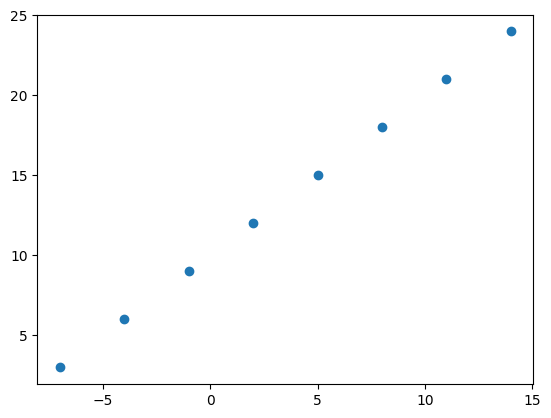

In [4]:
# Create feature
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [5]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# Input and Output shapes

In [6]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [7]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [8]:
X[0], y[0]

(-7.0, 3.0)

In [9]:
X[1], y[1]

(-4.0, 6.0)

In [10]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [11]:
X[0].ndim

0

In [12]:
# The model is expecting a 2-dimensional input (i.e., a batch of instances), but it’s receiving a 1-dimensional input (i.e., a single instance). You can fix this issue by reshaping your input data X to have an extra dimension. If X is a NumPy array, you can do this using the reshape method:
X = X.reshape(-1, 1)

In [13]:
# Turn our numpy arrays into tensors with dtype = float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [14]:
input_shape = input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([1]), TensorShape([]))

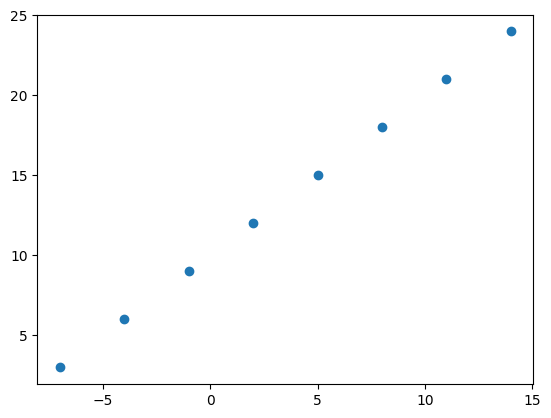

In [15]:
plt.scatter(X, y)

# Steps in modelling with TensorFlow

> 1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.

> 2. **Compiling a model** - define the loss funtion (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).

> 3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels).

In [16]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochasitc gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 359ms/step - loss: 20.5211 - mae: 20.5211
Epoch 2/5
1/1 [==============================] - 0s 8ms/step - loss: 20.2398 - mae: 20.2398
Epoch 3/5
1/1 [==============================] - 0s 8ms/step - loss: 19.9586 - mae: 19.9586
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 19.6773 - mae: 19.6773
Epoch 5/5
1/1 [==============================] - 0s 7ms/step - loss: 19.3961 - mae: 19.3961


In [17]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [18]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 74ms/step


array([[-20.663473]], dtype=float32)

# Improving our model

We can improve our model, by altering the steps we took to create a model.

> 1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hideen layers, change the activation function of each layer.

> 2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.

> 3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

Common ways to improve a deep model:

> * Adding layers

> * Increase/Decrease the number of hidden units

> * Change the activation function

> * Change the optimization function

> * Change the learning rate

> * Fitting on more data

> * Fitting for longer

In [19]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 221ms/step - loss: 18.1756 - mae: 18.1756
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 17.8944 - mae: 17.8944
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 17.6131 - mae: 17.6131
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 17.3319 - mae: 17.3319
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 17.0506 - mae: 17.0506
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 16.7694 - mae: 16.7694
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 16.4881 - mae: 16.4881
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 16.2069 - mae: 16.2069
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 15.9256 - mae: 15.9256
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 15.6444 - mae: 15.6444
Epoch 11/100
1/1 [==============================] - 0s 8m

In [20]:
X, y

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [21]:
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 57ms/step


array([[29.741293]], dtype=float32)

In [22]:
# Let's see if we can make another to improve our model

# 1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(50, activation=None),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 412ms/step - loss: 13.4450 - mae: 13.4450
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 12.8196 - mae: 12.8196
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 12.1931 - mae: 12.1931
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 11.5614 - mae: 11.5614
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 10.9200 - mae: 10.9200
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 10.2645 - mae: 10.2645
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 9.5916 - mae: 9.5916
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 8.8982 - mae: 8.8982
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 8.1815 - mae: 8.1815
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 7.4384 - mae: 7.4384
Epoch 11/100
1/1 [==============================] - 0s 9ms/step -

In [23]:
X, y

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [24]:
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 53ms/step


array([[25.662025]], dtype=float32)

# Evaluating a model

In practice, a typical workflow you'll go through when building neural networks is:

```
Build a model  -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```

When it comes to evaluation... there are 3 words you should memorize:

```
"Visualize, visualize, visualize"
```

It's a good idea to visualize:

> * The data - what data are we working with? What does it look like?

> * The model itself - what does our model look like?

> * The training of a model - how does a model perform while it learns?

> * The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [25]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [26]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

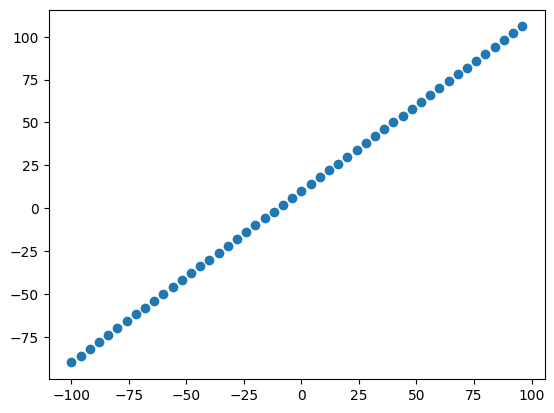

In [27]:
# Visualize the data
plt.scatter(X, y)

The 3 sets...

> * **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available.

> * **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available.

> * **Test set** - the model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data available.

In [28]:
# Check the length of how many samples we have
len(X)

50

In [29]:
# Split the data into train and test set
X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are the testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

# Visualizing the data

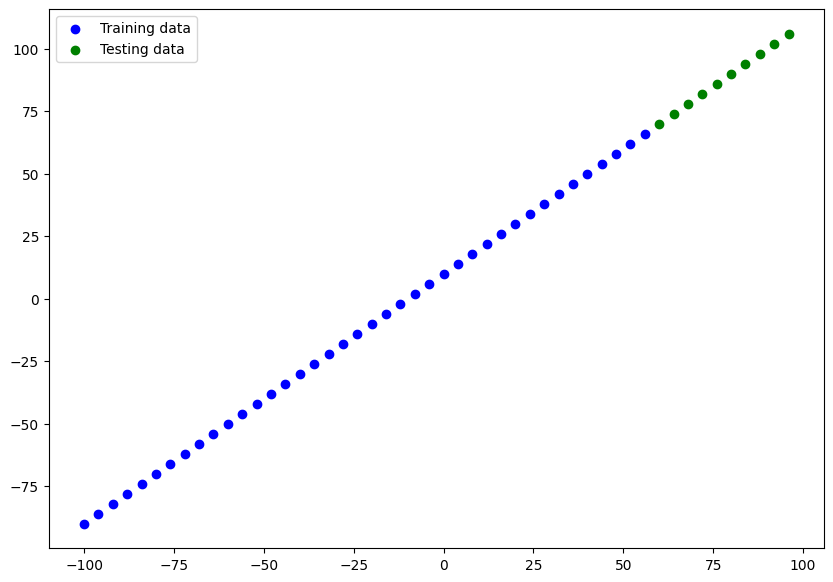

In [30]:
plt.figure(figsize=(10,7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
# Show a legend
plt.legend();

In [31]:
# Let's have a look at how to build a neural network for our data

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit the model
# model.fit(X_train, y_train, epochs=100)

# Visualizing the model

In [33]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [100]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [101]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


> * Total params - total number of parameters in the model.

> * Trainable parameters - these are the parameters (patterns) the model can update as it trains.

> * Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**).

In [102]:
# Fit the model
model.fit(X_train, y_train, epochs=100, verbose=0)

In [103]:
# Get a summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


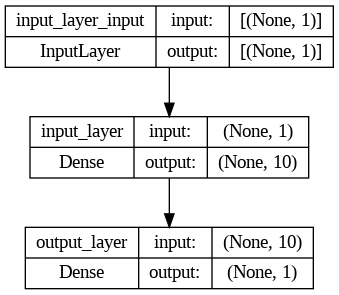

In [104]:
from tensorflow.keras.utils import plot_model
plot_model(model=model,show_shapes=True)

# Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model's predictions).

In [105]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 36ms/step


array([[ 70.33518 ],
       [ 74.91016 ],
       [ 79.485146],
       [ 84.06013 ],
       [ 88.63511 ],
       [ 93.21009 ],
       [ 97.78507 ],
       [102.360054],
       [106.93504 ],
       [111.51002 ]], dtype=float32)

In [106]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

> **Note**: If you feel like you're going to reuse some kind of functionality in the future, it's a good idea to turn it into a function

In [107]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels.
  """
  plt.figure(figsize=(10,7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show a legend
  plt.legend();

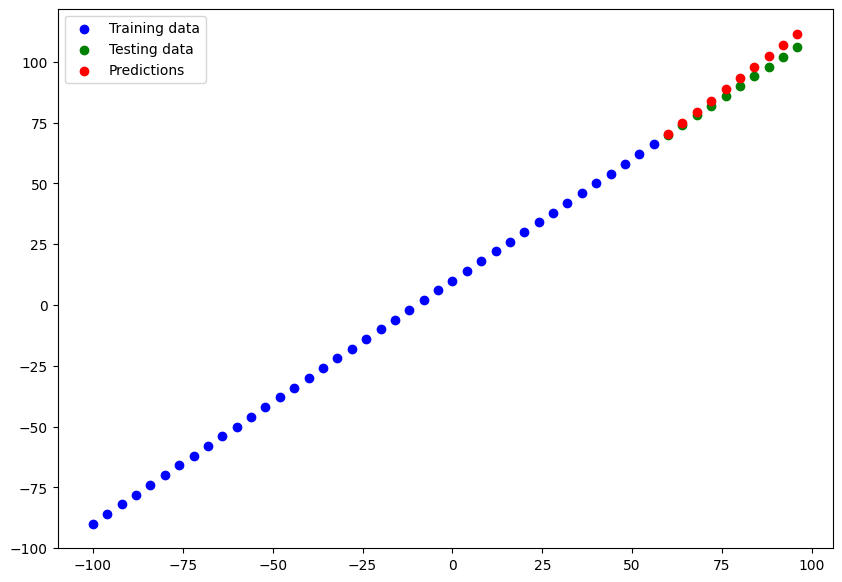

In [108]:
plot_predictions()

# Evaluting our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:

> * MAE - mean absolute error, "on average, how wrong is each of my model's predictions"

> * MSE - mean square error, "square the average errors"

In [109]:
# Evaluating the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 85ms/step - loss: 2.9226 - mae: 2.9226


[2.9225997924804688, 2.9225997924804688]

In [110]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.731853, 14.253906, 11.805942, 10.387975, 10.      , 10.642018,
       12.314029, 15.088043, 18.935043, 23.510017], dtype=float32)>

In [111]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.33518 ],
       [ 74.91016 ],
       [ 79.485146],
       [ 84.06013 ],
       [ 88.63511 ],
       [ 93.21009 ],
       [ 97.78507 ],
       [102.360054],
       [106.93504 ],
       [111.51002 ]], dtype=float32)>

In [112]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [113]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.33518 ,  74.91016 ,  79.485146,  84.06013 ,  88.63511 ,
        93.21009 ,  97.78507 , 102.360054, 106.93504 , 111.51002 ],
      dtype=float32)>

In [114]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=2.9225998>

In [115]:
# Calculate the mean squared error
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=11.269078>

In [116]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                       y_pred=tf.squeeze(y_pred))

# Running experiments to improve our model
```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it ...
```
> 1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).

> 2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.

> 3. Train for longer - give your model more of a chance to find patterns in the data.

Let's do 3 modelling experiments:

> 1. `model_1` - same as the original model, 1 layer, trained for 100 epochs

> 2. `model_2` - 2 layers, trained for 100 epochs

> 3. `model_3` - 2 layers, trained for 500 epochs

## **Build `model_1`**

In [120]:
X_train = np.array(X_train)

In [121]:
X_train = X_train.reshape(-1, 1)

In [124]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 8ms/step - loss: 14.1837 - mae: 14.1837
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 10.3493 - mae: 10.3493
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 10.7274 - mae: 10.7274
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 9.5276 - mae: 9.5276
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 10.4314 - mae: 10.4314
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 9.6621 - mae: 9.6621
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 8.7639 - mae: 8.7639
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 9.0592 - mae: 9.0592
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 19.2388 - mae: 19.2388
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 10.3842 - mae: 10.3842
Epoch 11/100
2/2 [==============================] - 0s 5ms/step - l

1/1 [==============================] - 0s 35ms/step


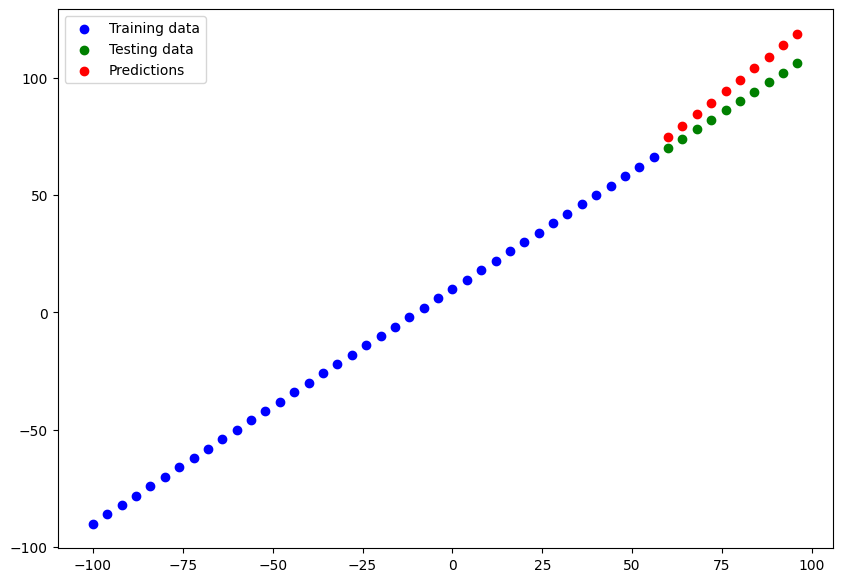

In [125]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [126]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=8.643931>,
 <tf.Tensor: shape=(), dtype=float32, numpy=81.2384>)

## **Build `model_2`**

In [141]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3. Fit the model
model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 13ms/step - loss: 31.0961 - mse: 1378.8904
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 26.6452 - mse: 914.1961
Epoch 3/100
2/2 [==============================] - 0s 11ms/step - loss: 31.2318 - mse: 1481.3284
Epoch 4/100
2/2 [==============================] - 0s 14ms/step - loss: 30.2991 - mse: 1368.5879
Epoch 5/100
2/2 [==============================] - 0s 13ms/step - loss: 15.4473 - mse: 307.0938
Epoch 6/100
2/2 [==============================] - 0s 11ms/step - loss: 12.2572 - mse: 187.8265
Epoch 7/100
2/2 [==============================] - 0s 10ms/step - loss: 11.5387 - mse: 162.1648
Epoch 8/100
2/2 [==============================] - 0s 11ms/step - loss: 11.2225 - mse: 178.2162
Epoch 9/100
2/2 [==============================] - 0s 11ms/step - loss: 41.9514 - mse: 2809.1968
Epoch 10/100
2/2 [==============================] - 0s 12ms/step - loss: 29.1524 - mse: 1201.9441
Epoch 11/100
2/2 [================

1/1 [==============================] - 0s 41ms/step


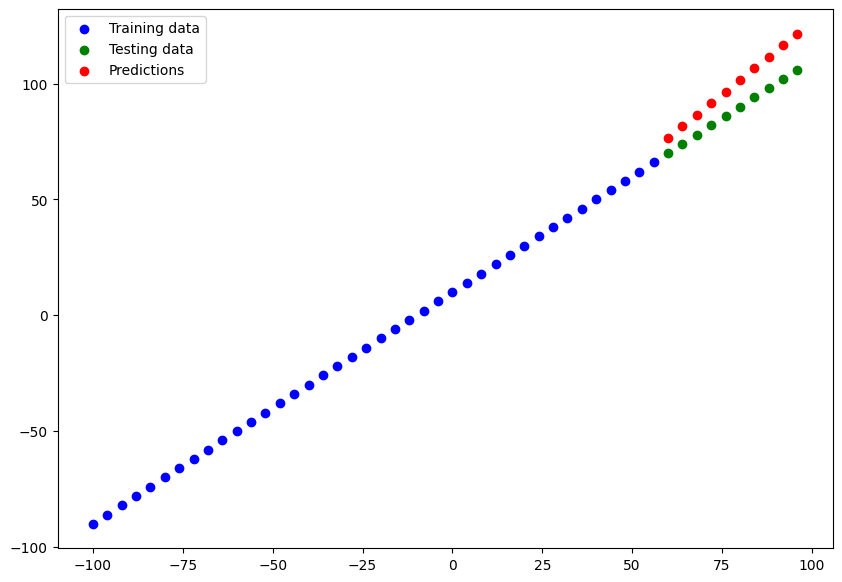

In [142]:
# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [143]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=11.028124>,
 <tf.Tensor: shape=(), dtype=float32, numpy=129.69533>)

## **Build `model_3`**

In [137]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(X_train, y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 13ms/step - loss: 12.9581 - mae: 12.9581
Epoch 2/500
2/2 [==============================] - 0s 8ms/step - loss: 19.7584 - mae: 19.7584
Epoch 3/500
2/2 [==============================] - 0s 8ms/step - loss: 20.3982 - mae: 20.3982
Epoch 4/500
2/2 [==============================] - 0s 8ms/step - loss: 13.2118 - mae: 13.2118
Epoch 5/500
2/2 [==============================] - 0s 9ms/step - loss: 17.2875 - mae: 17.2875
Epoch 6/500
2/2 [==============================] - 0s 8ms/step - loss: 10.1336 - mae: 10.1336
Epoch 7/500
2/2 [==============================] - 0s 8ms/step - loss: 11.1117 - mae: 11.1117
Epoch 8/500
2/2 [==============================] - 0s 8ms/step - loss: 11.0929 - mae: 11.0929
Epoch 9/500
2/2 [==============================] - 0s 9ms/step - loss: 40.3675 - mae: 40.3675
Epoch 10/500
2/2 [==============================] - 0s 9ms/step - loss: 27.7752 - mae: 27.7752
Epoch 11/500
2/2 [==============================] - 0s 12m

1/1 [==============================] - 0s 40ms/step


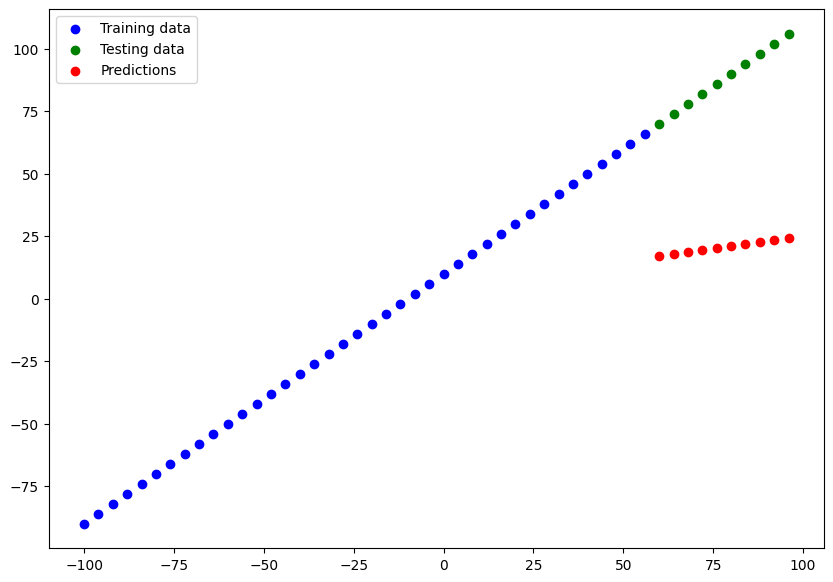

In [144]:
# Make and plot predictions for model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [145]:
# Calculate model_2 evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.29098>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4610.905>)

# Comparing the results of our experiments

We've run a few experiments, let's compare the results.

In [148]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,8.643931,81.238403
1,model_2,11.028124,129.695328
2,model_3,67.290977,4610.904785


Looks like `model_1` performed the best...

In [150]:
model_1.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


> **Note**: One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember the machine learning practioner's motto: "experiment, experiment, experiment".

# Saving our models

Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as in a web application or a mobile app.

There are two main formats we can save our model's too:

> 1. The SavedModel format

> 2. The HDF5 format

In [151]:
# Save model using the SavedModel format
model_1.save("best_model_SavedModel_format")

In [152]:
# Save model using the HDF5 format
model_1.save("best_model_HDF5_format.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Loading in a saved model

In [153]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [154]:
# Compare model_1 predictions with SavedModel format model predictions
model_1_preds = model_1.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_1_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 36ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [156]:
# Compare the MAE of model_1 preds and loaded_SavedModel_preds
mae(y_true=y_test, y_pred=model_1_preds) == mae(y_true=y_test, y_pred=loaded_SavedModel_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [157]:
# Load in a model using the .h5 format
loaded_h5_model = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [158]:
# Check to see if loaded .h5 model predictions match model_1
model_1_preds = model_1.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_1_preds == loaded_h5_model_preds

1/1 [==============================] - 0s 38ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

# Download a model (or any other file) from Google Colab

If you want to download your files from Google Colab:

> 1. You can go to the "files" tab and right click on the file you're after and click "download".

> 2. Use code (see the cell below).

> 3. Save it to Google Drive by connecting Google Drive and copying it there (see 2nd code cell below).

In [159]:
# Download a file from Google Colab
from google.colab import files
files.download("/content/best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [161]:
# Save a file from Google Colab to Google Drive (requires mounting Google Drive)
!cp /content/best_model_HDF5_format.h5 /content/drive/MyDrive/tensorflow_course

In [162]:
!ls /content/drive/MyDrive/tensorflow_course

/content/drive/MyDrive/tensorflow_course


# A larger example

In [163]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [165]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [167]:
insurance["sex"], insurance["smoker"], insurance["age"]

(0       female
 1         male
 2         male
 3         male
 4         male
          ...  
 1333      male
 1334    female
 1335    female
 1336    female
 1337    female
 Name: sex, Length: 1338, dtype: object,
 0       yes
 1        no
 2        no
 3        no
 4        no
        ... 
 1333     no
 1334     no
 1335     no
 1336     no
 1337    yes
 Name: smoker, Length: 1338, dtype: object,
 0       19
 1       18
 2       28
 3       33
 4       32
         ..
 1333    50
 1334    18
 1335    18
 1336    21
 1337    61
 Name: age, Length: 1338, dtype: int64)

In [169]:
# Let's try one-hot encode our DataFrame so it's all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [170]:
# Create X & y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [171]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [172]:
# View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [173]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [176]:
# Build a neural network
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 8652.5898 - mae: 8652.5898
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7884.6777 - mae: 7884.6777
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7573.4214 - mae: 7573.4214
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7668.5278 - mae: 7668.5278
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7827.7217 - mae: 7827.7217
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7630.1313 - mae: 7630.1313
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7560.4937 - mae: 7560.4937
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7800.4995 - mae: 7800.4995
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7606.1143 - mae: 7606.1143
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7711.1978 - mae: 7711.1978

In [177]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8746.2480 - mae: 8746.2480


[8746.248046875, 8746.248046875]

In [178]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

Right now it looks like our model isn't performing too well... let's try and improve it!

To (try) improve our model, we'll run 2 experiments:

1. Add an extra layer with more hidden units and use the Adam optimizer
2.Same as above but train for longer (200 epochs)

In [180]:
# Build a neural network
tf.random.set_seed(42)

# 1. Create a model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 1ms/step - loss: 13308.8623 - mae: 13308.8623
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 13173.1475 - mae: 13173.1475
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 12877.7793 - mae: 12877.7793
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 12268.1729 - mae: 12268.1729
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 11203.1904 - mae: 11203.1904
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 9764.3291 - mae: 9764.3291
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8363.2812 - mae: 8363.2812
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7605.1133 - mae: 7605.1133
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7454.2788 - mae: 7454.2788
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7431.7959 - mae:

In [181]:
# Check the results of the insurance model on the test data
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4963.2598 - mae: 4963.2598


[4963.259765625, 4963.259765625]

In [183]:
# Build a neural network
tf.random.set_seed(42)

# 1. Create a model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

# 3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 3ms/step - loss: 13311.7236 - mae: 13311.7236
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13196.2178 - mae: 13196.2178
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12932.6406 - mae: 12932.6406
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 12380.3096 - mae: 12380.3096
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 11393.9482 - mae: 11393.9482
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 9991.3721 - mae: 9991.3721
Epoch 7/200
34/34 [==============================] - 0s 4ms/step - loss: 8532.4902 - mae: 8532.4902
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 7630.5620 - mae: 7630.5620
Epoch 9/200
34/34 [==============================] - 0s 4ms/step - loss: 7427.6714 - mae: 7427.6714
Epoch 10/200
34/34 [==============================] - 0s 4ms/step - loss: 7402.3574 - mae:

In [184]:
# Check the results of the insurance model on the test data
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3507.3567 - mae: 3507.3567


[3507.356689453125, 3507.356689453125]

Text(0.5, 0, 'epochs')

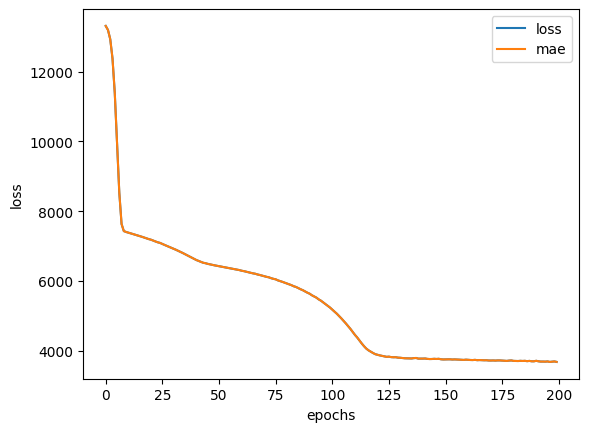

In [185]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

> Question: How long should you train for?

> It depends. Really... it depends on the problem you're working on. However, many people have asked this question before... so TensorFlow has a solution! It's called the EarlyStopping Callback, which is a TensorFlow component you can add to your model to stop training once it stops improving a certain metric.

# Preprocessing data (normalization and standardization)

In terms of scaling values, neural networks tend to prefer normalization.

If you're not sure on which to use, you could try both and see which performs better.

In [186]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


<Axes: ylabel='Frequency'>

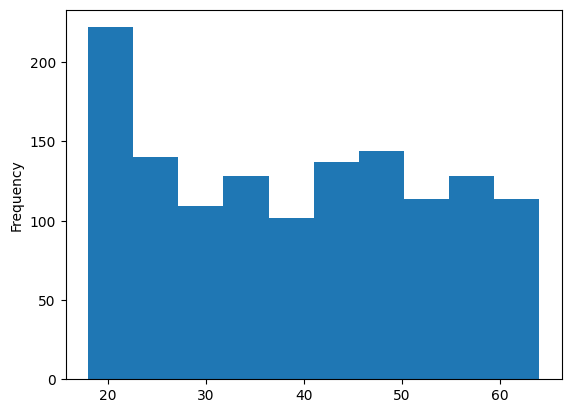

In [187]:
X["age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

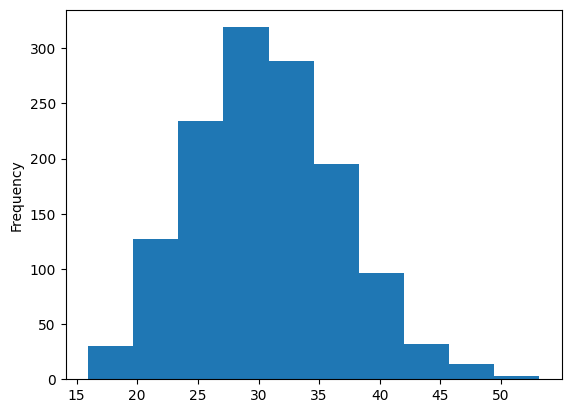

In [188]:
X["bmi"].plot(kind="hist")

In [189]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [190]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [191]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values from these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [207]:
# What does our data look like now
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [206]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [196]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

In [197]:
# Build a neural network model to fit on our normalized data
tf.random.set_seed(42)

# 1. Create the model
insurance_model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
insurance_model_4.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 4ms/step - loss: 13342.8301 - mae: 13342.8301
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 13331.8926 - mae: 13331.8926
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 13305.4873 - mae: 13305.4873
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 13252.7188 - mae: 13252.7188
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 13162.5732 - mae: 13162.5732
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 13024.0098 - mae: 13024.0098
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 12826.9043 - mae: 12826.9043
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 12561.4160 - mae: 12561.4160
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 12217.6240 - mae: 12217.6240
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 11795.83

In [198]:
# Evalaute our insurance model trained on normalized data
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 1s 3ms/step - loss: 3437.3328 - mae: 3437.3328


[3437.332763671875, 3437.332763671875]